In [12]:
from gekko import GEKKO

m=GEKKO(remote=False)
n=[0,1,2,3,4,5,6]
t=[m.Intermediate(i**2) for i in n]

mx = t[0] # max
mn = t[0] # min
for i in range(1,len(n)):
    mx = m.max2(mx,t[i])
    mn = m.min2(mn,t[i])

# initialize with IPOPT
m.options.IMODE = 3 # type: ignore
m.options.SOLVER = 3
m.solve(False)

print(mx.value[0])
print(mn.value[0])

35.99999999
5.7947856276e-08


In [16]:
from gekko import GEKKO
from back_end.sys_utils import get_eq_data

m = GEKKO(remote=False)
m.options.IMODE = 2 # type: ignore

x_data, y_data = get_eq_data()

Xi  = m.Var(lb=0, ub=1, value=0.5)
Yi  = m.Var(lb=0, ub=1, value=0.5)

# alpha   = m.Var(lb=0)

m.cspline(Xi, Yi, x_data, y_data)
# m.Equation(Xi == Yi/(Yi + alpha*(1 - Yi)))
m.Equation(Xi == 0.9)

m.solve(False)

print(Xi.VALUE)
print(Yi.VALUE)
# print(alpha.VALUE)


[0.9]
[0.96]


1.01

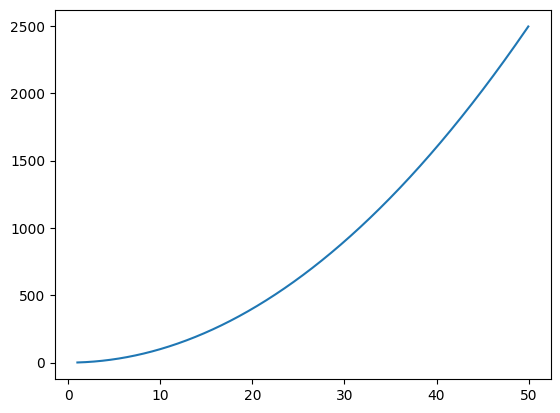

In [ ]:
import matplotlib.pyplot as plt
import math as mt

def f1(x):
    return x**2

def f2(x):
    return 3_000/x

xs = [x/100 for x in range(101, 5_000, 5)]
ys = [f2(xi) for xi in xs]

plt.plot(xs, ys)

xs[ys.index(min(ys))]

In [1]:
from scipy.optimize import minimize, rosen

x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)

res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.9420640199868412e-13
             x: [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]
           nit: 295
          nfev: 494
 final_simplex: (array([[ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       ...,
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00]]), array([ 1.942e-13,  2.450e-13,  3.104e-13,  3.380e-13,
                        5.522e-13,  7.166e-13]))